<a href="https://colab.research.google.com/github/ErikaDivantoque/Talento_Tech/blob/main/Laboratorio_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO 1**

Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

#**1. El problema del negocio**

---

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#**2. El set de datos**

---


La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#**3. Una primera mirada al dataset**

---

##*1. Establecemos conexion con el DATASET*

In [120]:
# Importar librerías

import pandas as pd              #Pandas
import matplotlib.pyplot as plt  #Marplotlib
import seaborn as sns            #Seaborn

**Opción 1. Cargar archivos a mi ruta personal de DRIVE**

In [121]:
# Lectura de Drive dentro del modulo Colab

from google.colab import drive
drive.mount('/content/drive') #Establecemos la conexion atraves del metodo mount

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Establecer la conexion con el Dataset Bancario .csv

path= '/content/drive/MyDrive/Colab Notebooks/DA_Talento/data/dataset_banco.csv'

# Leer el dataset con la libreria Pandas
df_banco = pd.read_csv(path, delimiter=",")

# Imprimir el dataframe
#print(df_banco)

**Opción 2. Cargar a un archivo, indicandole a Colab donde esta para que busque el archivo**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

**Opción 3. Cargar datos sin autorizacion de DRIVE (manual)**

Si se termina la sesion los archivos ya no van a estar en el entorno



In [ ]:
#pd.read.csv('/content/drive/MyDrive/Colab Notebooks/DA_Talento/data/dataset_banco.csv')

###*2. Visualizacion y Exploracion de los datos*

In [123]:
#Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
print(df_banco.shape)
# Muestra las primeras filas de la tabla
df_banco.head(20)

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,Management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,div.,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,No,unknown,5,may,55.0,1,-1.0,0,unknown,no


###3.Transformacion de nombres de Atributos

Metodo 1

In [124]:
#cambia los nombres de las columnas del dataframe
df_rename=df_banco.rename(columns={
                  'age': 'edad',
                  'job': 'empleo',
                  'marital': 'estado_civil',
                  'education':'educacion',
                  'default':'morocidad',
                  'balance':'saldo',
                  'housing':'vivienda',
                  'loan':'prestamo',
                  'contact':'contacto',
                  'day':'dia',
                  'month':'mes',
                  'duration':'duracion',
                  'campaign':'campaña',
                  'pdays':'dias_previos',
                  'previous':'anterior',
                  'poutcome':'resultado',
                  'y':'respuesta'
})

#Verificamos los cambios
print(df_rename.head())

   edad        empleo estado_civil  educacion morocidad   saldo vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  prestamo contacto  dia  mes  duracion  campaña  dias_previos  anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0   
3       no  unknown    5  may      92.0        1          -1.0         0   
4       no  unknown    5  may     198.0        1          -1.0         0   

  resultado respuesta  
0   unknown        no  
1   unknown        no  
2   unknown   

Metodo 2

In [125]:
#Sabiendo que la tabla tiene 17 columnas y el orden de ellas, renombramos las columnas
df_banco.columns = ['edad',
                    'empleo',
                    'estado_civil',
                    'educacion',
                    'morocidad',
                    'saldo',
                    'vivienda',
                    'prestamo',
                    'contacto',
                    'dia',
                    'mes',
                    'duracion',
                    'campaña',
                    'dias_previos',
                    'anterior',
                    'resultado',
                    'respuesta']

print(df_banco.columns)

Index(['edad', 'empleo', 'estado_civil', 'educacion', 'morocidad', 'saldo',
       'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion', 'campaña',
       'dias_previos', 'anterior', 'resultado', 'respuesta'],
      dtype='object')


###Variables categoricas y las numericas

In [126]:
# Muestra información sobre el DataFrame.
data = df_rename
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          45215 non-null  int64  
 1   empleo        45213 non-null  object 
 2   estado_civil  45214 non-null  object 
 3   educacion     45214 non-null  object 
 4   morocidad     45215 non-null  object 
 5   saldo         45213 non-null  float64
 6   vivienda      45215 non-null  object 
 7   prestamo      45215 non-null  object 
 8   contacto      45215 non-null  object 
 9   dia           45215 non-null  int64  
 10  mes           45215 non-null  object 
 11  duracion      45214 non-null  float64
 12  campaña       45215 non-null  int64  
 13  dias_previos  45214 non-null  float64
 14  anterior      45215 non-null  int64  
 15  resultado     45215 non-null  object 
 16  respuesta     45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


**categoricas** = df.select_dtypes(include=['object']).columns.tolist()*

Este comando selecciona todas las columnas del DataFrame que tiene el **tipo de datos OBJECT**, lo cual usualmente indica **datos categoricos** o de texto. Luego, convierte los nombres de estas columnas en una lista y los almacena en la variable categoricas

**numericas** = df.select_dtypes(include=['int64','float64']).columns.tolist()*

Este comando selecciona todas las columnas de DataFrame que tiene tipos de datos numericos (**int64** para enteros y **float64** para numeros decimales). Convierte los nombres de estas columnas en una lista y los almacena en la variable numerica

In [127]:
# Clasificar columnas

categoricas = df_banco.select_dtypes(include=['object']).columns.tolist()
numericas = df_banco.select_dtypes(include=['int64','float64']).columns.tolist()

print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['empleo', 'estado_civil', 'educacion', 'morocidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']


In [128]:
# Contar por atributo
pd.value_counts(data['educacion'])

educacion
secondary    23197
tertiary     13302
primary       6849
unknown       1855
SECONDARY        3
Primary          2
sec.             2
UNK              2
Secondary        1
Tertiary         1
Name: count, dtype: int64

**mean**: Es el promedio

      *El promedio de edad es de 41 años de edad
      *En promedio se contacto a las personas el dia 15 del mes por ultima vez. (Si la personas estaba interesada, en ese tiempo ya se ha perdido el interes)

**std**: Es la desviacion estandar, la variacion de los datos respecto a la media, que cantidad de datos estan aislados

      * 100 dias transcurridos en los que las personas no fueron contactados. Revisar los KPIs


In [129]:
# Proporciona estadísticas descriptivas para columnas numéricas.
data.describe()

,edad,saldo,dia,duracion,campaña,dias_previos,anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#**4. Limpieza**

Teniendo en cuenta las situaciones mas comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden el problema que queremos resolver)
3. Registros (filas) repetidas
4. Valores extremos (outliers) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos.
5. Errores tipograficos en el caso de las variables categóricas


*Al final de este proceso de limpieza deberiamos tener un set de datos integro, listo para la fase de Analisis Exploratorio.*

##4.1 Datos Faltantes

Aca comenzamos a ver que los datos no estan completos, pues no todos las columnas tienen la misma cantidad de registros.

El numero total de registros deberia ser 45215. Sin embargo columnas como 'job','marital',education','balance', 'duration' y 'pdays'.

Por ser tan pocos los datos faltantes optaremos por eliminar las filas correspondientes

####*Comandos de Limpieza de Datos*
##### Se ultiliza para identificar los valores faltantes (NaN) en un DataFrame
    df.isna().sum()

*df.isna()* devuelve un DataFrame del mismo tamano que df con valores booleanos, donde:
* TRUE indica la presencia de un NaN
* FALSE indica la ausencia

*.sum()* Suma los valores TRUE (Que se interpretan como 1) en cada columna devolviendo una serie con el conteo NaN por columna



In [132]:
# Comando para contar los valores faltantes de mi DataFrame
data.isna().sum()

edad            0
empleo          0
estado_civil    0
educacion       0
morocidad       0
saldo           0
vivienda        0
prestamo        0
contacto        0
dia             0
mes             0
duracion        0
campaña         0
dias_previos    0
anterior        0
resultado       0
respuesta       0
dtype: int64

*.dropna()*  permite filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.

*Devuelve una nueva serie tras eliminar los valores nulos*

In [131]:
# Elimina los valores faltantes de mi DataFrame
data.dropna(inplace=True)  # Inplace: (Por defaul is False: Devuelve una copia con los cambios) True: la eliminacion se realiza en el DataFrame actual

#Conteo de valores por columna
data.count()

edad            45207
empleo          45207
estado_civil    45207
educacion       45207
morocidad       45207
saldo           45207
vivienda        45207
prestamo        45207
contacto        45207
dia             45207
mes             45207
duracion        45207
campaña         45207
dias_previos    45207
anterior        45207
resultado       45207
respuesta       45207
dtype: int64

In [133]:
# Proporciona estadísticas descriptivas para columnas numéricas.
data.describe()

,edad,saldo,dia,duracion,campaña,dias_previos,anterior
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [134]:
# prompt: contar la extension de letras en la columna educacion
data['educacion'].apply(len)

0        8
1        9
2        9
3        7
4        7
        ..
45210    8
45211    7
45212    9
45213    9
45214    9
Name: educacion, Length: 45207, dtype: int64

##4.2 Columnas Irrelevantes
Una columna irrelevante puede ser:
*   **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (Deporte favorito, hobbies, comida favorita, etc)
*   **Una columna categórica pero con un sólo nivel** Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown"
*   **Una columna numérica pero con un sólo valor** Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50
*   **Columnas con información redundante** Por ejemplo si además de las columnas "Month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y mas adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no)

En este caso todas las columnas pueden resultar relevantes, pero debemos veririficar que no haya columnas categoricas con un solo nivel, o columnas numericas con un solo valor:



###**for col in cols_cat**:

Este es un bucle *for* que itera sobre cada elemento en la lista *cols_cat*. La variable *col* tomara el valor de cada elemento en cada iteracion del bucle.

    print(f'Columna {col}: {data[col.nunique()} subniveles')
Dentro del bucle, esta linea de codigo imprime un mesanje que indica el nombre de la columna (*col*), seguido por el numero de subniveles unicos en esa columna.

    f'Columna {col}: {data[col].nunique()} subniveles'
Esta es una cadea de formato (*f-string*) que contiene dos variables:

* *{col}*:Representa el nombre de la columna actual en la iteracion del bucle.
* *{data[col].nunique()}*: Representa el numero de subniveles unicos en la columna actual.
* *data[col]*: Selecciona la columna actual del DataFrame
* *.nunique()*: Calcula el numero de valores unicos en esa columna



In [135]:
# Conteo de los niveles diferentes en las diferentes columnas Categóricas
cols_cat = ['empleo', 'estado_civil', 'educacion', 'morocidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']

# Ciclo for para contar los unicos subniveles por variable categorica con (nunique)
for col in cols_cat: # Llama todo lo que esta en cols_cat. (col = columna)
  print(f'Columna {col}: {data[col].nunique()} subniveles') # Imprime a cada columna y cuenta e indica los valores unicos de cada columna. (Columna en mayuscula es un comentario)
                                                            # f-string:Lo que esta dentro de las comillas sencillas lo formatea y usa {} para usar valores de variables dentro de cadenas f

Columna empleo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna morocidad: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado: 6 subniveles
Columna respuesta: 2 subniveles


In [136]:
# Contar la cantidad de subniveles por variable categorica 'empleo'
pd.value_counts(data['empleo'])

empleo
blue-collar       9730
management        9454
technician        7597
admin.            5166
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

Todas las columnas categoricas tienen mas de 1 subnivel. *No eliminaremos ninguna columna categorica*

Verifiquemos lo que ocurre con las columnas numericas:

  Todas las columnas numericas tienen desviaciones estadar ("std") diferentes de cero, lo que indica que no tienen un unico valor. *Preservaremos todas las columnas numericas*


La **desviación estándar** es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varian los valores individuales de un conjunto de datos con respecto a su valor promedio.

  Imagina que tienes un conjunto de datos que reprenseta las alturas de estudiantes en clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

  Entonces, la desviación estandar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviacion estándar alta indica que los datos estan mas dispersos o deparados del promedio.

In [137]:
# Calcular la desviación estándar para las columnas numéricas
desviaciones_estandar = data[['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']].std()

# Imprimir las desviaciones estándar
print(desviaciones_estandar)

edad              12.037399
saldo           3924.491665
dia                8.323015
duracion         257.460759
campaña            3.098058
dias_previos     100.103283
anterior           2.303341
dtype: float64


In [138]:
# Desviaciones estándar para la variable "dias_previos"
destd_dias_previos=data[['dias_previos']].std()

#Imprimir las desviaciones estándar
print(destd_dias_previos)

dias_previos    100.103283
dtype: float64


**MATPLOTLIB**

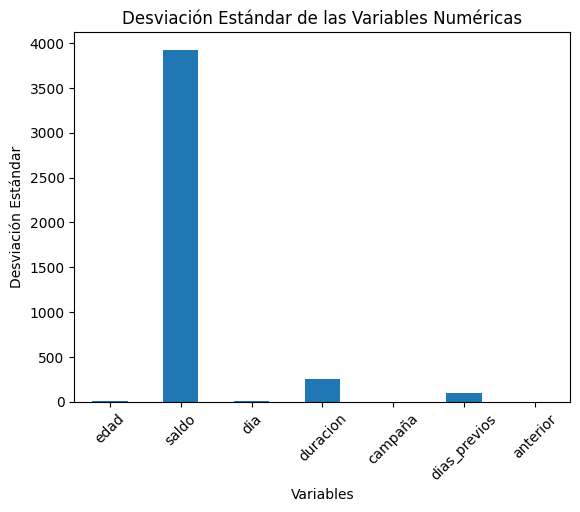

In [139]:
# Crear una gráfica de barras para representar las desviaciones estándar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

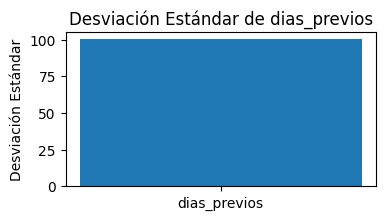

In [140]:
# Graficar la desviación estándar de 'dias_previos'
plt.figure(figsize=(4,2)) # Configura el tamaño de la figura
plt.bar('dias_previos', destd_dias_previos) #Crea una barra para la desviación estándar de 'dias_previos'
plt.title('Desviación Estándar de dias_previos')
plt.ylabel('Desviación Estándar')
plt.show()

In [141]:
# Calcula la media del atributo "dias_previos: dias de contacto al usuario de la campana actual"

media = data['dias_previos'].mean()

print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.17822461123277


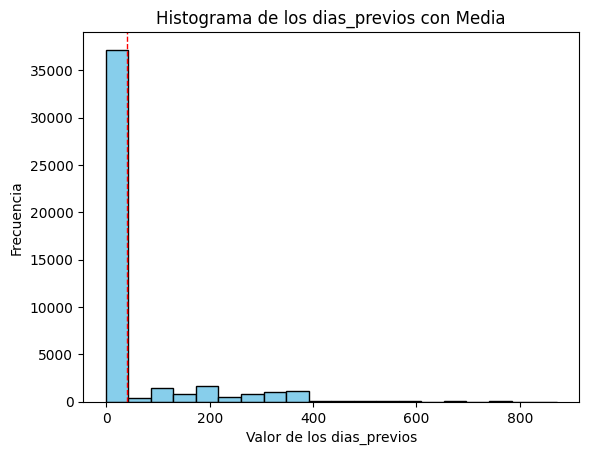

In [142]:
# Graficar un histograma del atributo "dias_previos"
plt.hist(data['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una linea vertical para mostrar la media
plt.axvline(media, color='red', linestyle ='dashed', linewidth=1)

#Etiquetas y titulo
plt.xlabel('Valor de los dias_previos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los dias_previos con Media')

#Mostrar la grafica
plt.show()

##4.3 Filas Repetidas

In [143]:
# Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)

# Mostramos la cantidad de registros despues de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set despues de elimnar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set despues de elimnar las filas repetidas: (45203, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener informacion importante.

Creemos graficas tipo "Boxplot" de las columnas numéricas:

**SEABORN**

*Interfaz para dibujar graficos estadisticos atractivos e informativos*

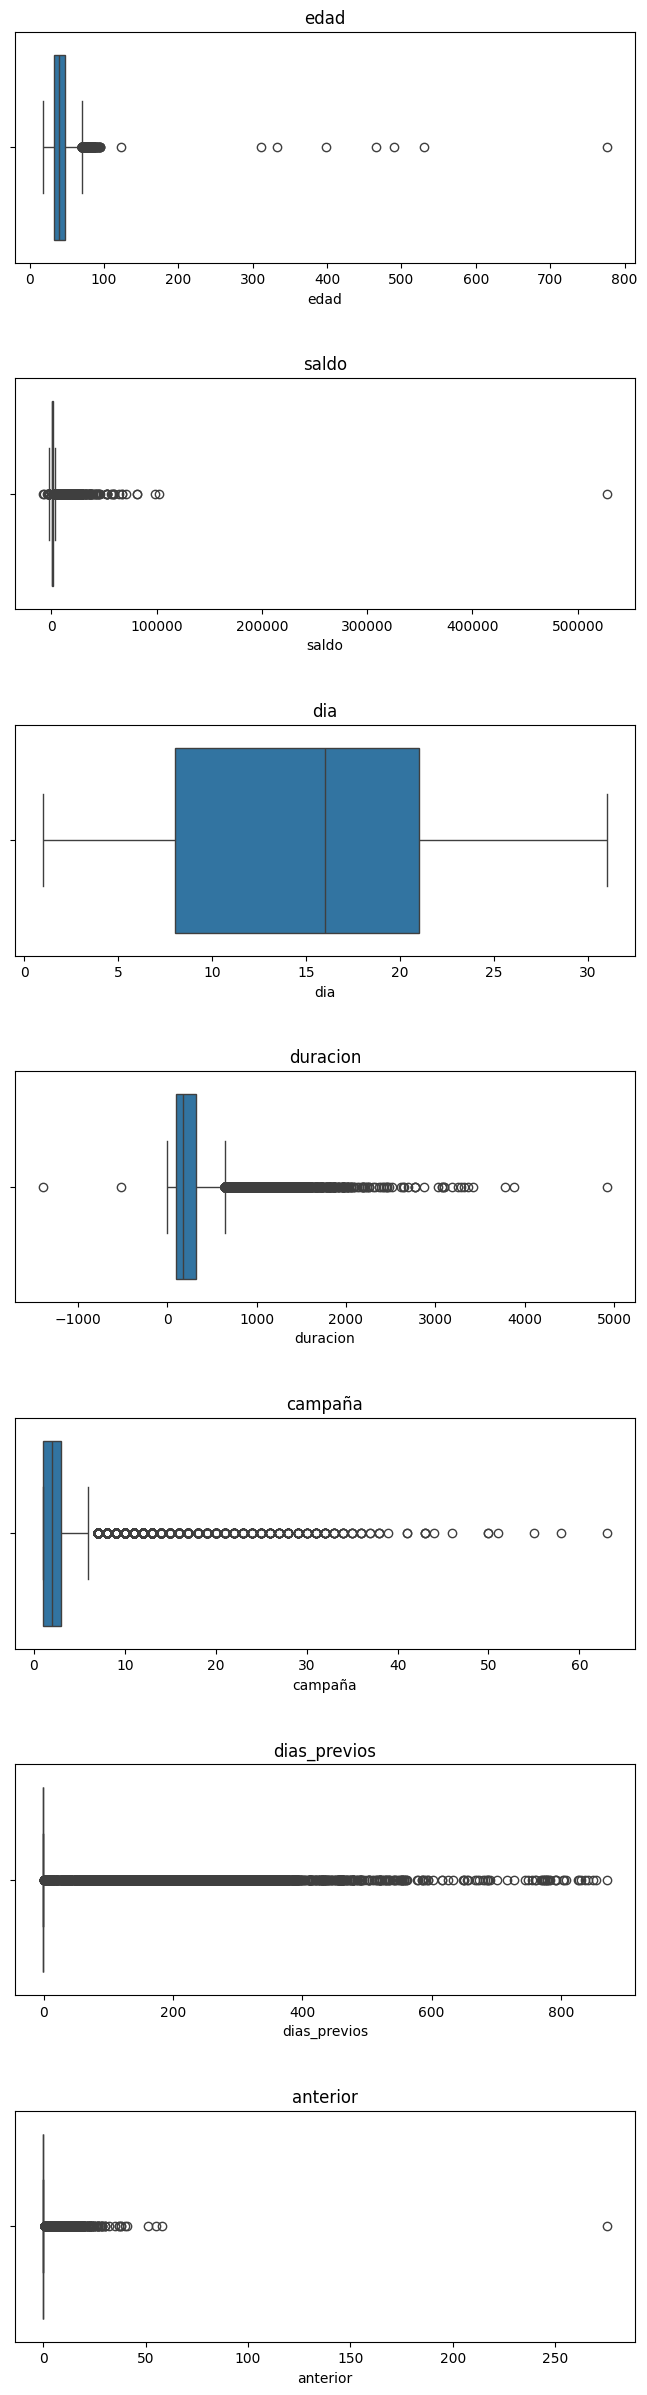

In [144]:
# Generar gráficas individuales pues las variables numéricas estan en rangos diferentes

cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))  #Genera nrows:numero de filas, ncols:numero de columnas, figsize:Tamaño
fig.subplots_adjust(hspace=0.5) # Espaciado

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)


**Observaciones:**

*   "edad": Hay sujetos con edades mucho mayores a 100 años
*   "duracion": Hay valores negativos
*   "anterior": Hay valores extremadamente alto (cercano a 300)



In [145]:
# Eliminar filas con "edad" > 100

print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index) # Elimina de data dentro de edad todo los mayores a 100. Index va revisando posicion por posición
print(f'Tamaño del set despues de elimnar registros de edad:{data.shape}')


Tamaño del set antes de eliminar registros de edad: (45203, 17)
Tamaño del set despues de elimnar registros de edad:(45195, 17)


In [146]:
# Eliminar filas con "duracion" < 0

print(f'Tamaño del set antes de eliminar registros de duracion: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index) # Elimina de data dentro de duracion todo los menores a 0. Index va revisando posicion por posición
print(f'Tamaño del set despues de elimnar registros de duración:{data.shape}')

Tamaño del set antes de eliminar registros de duracion: (45195, 17)
Tamaño del set despues de elimnar registros de duración:(45193, 17)


In [147]:
# Eliminar filas con "anterior" > 100
print(f'Tamaño del set antes de eliminar registros de anterior: {data.shape}')
data = data.drop(data[data['anterior'] > 100].index)
#data = data
print(f'Tamaño del set despues de elimnar registros de anterior:{data.shape}')

Tamaño del set antes de eliminar registros de anterior: (45193, 17)
Tamaño del set despues de elimnar registros de anterior:(45192, 17)


##4.5 Errores tipográficos en variable Categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerian diferentes.

Se deben unificar estos sub-niveles

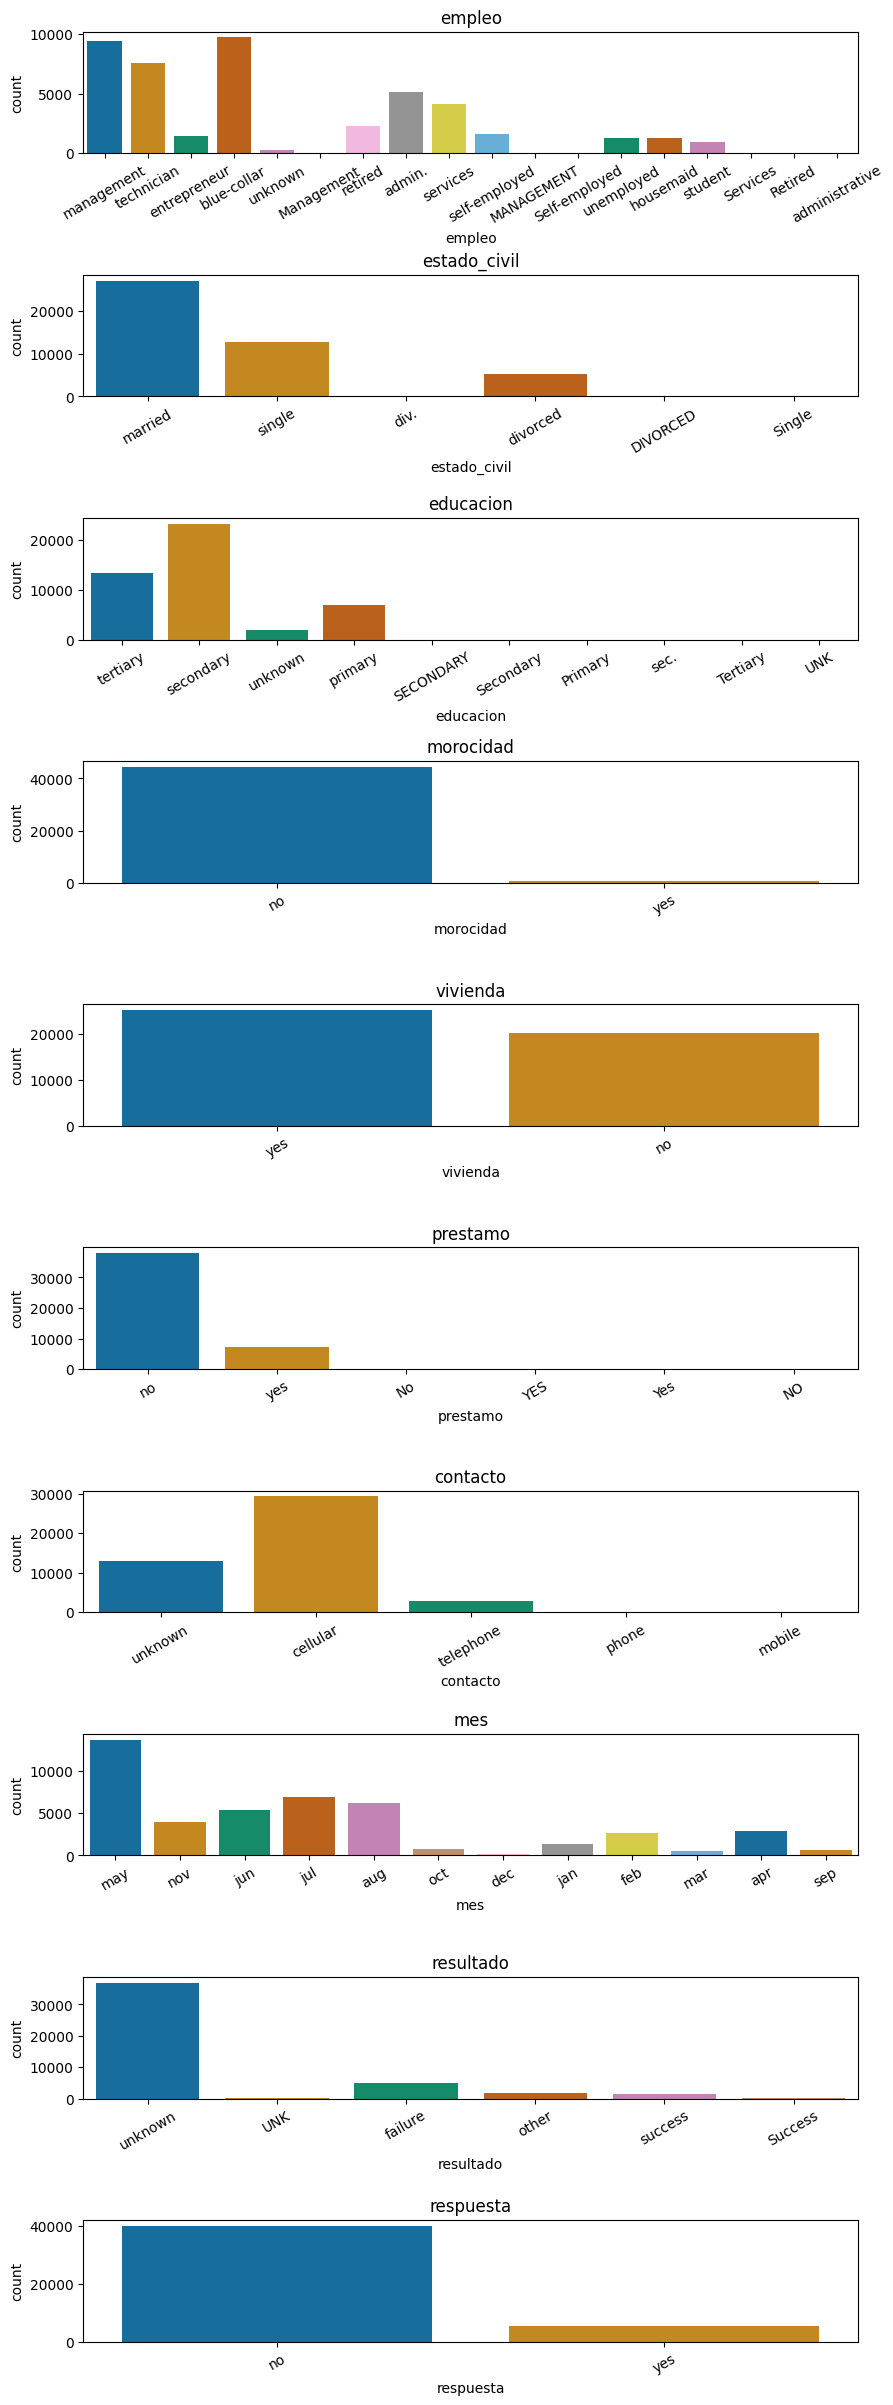

In [148]:
# Graficar los subniveles de cada varibale categorica
cols_cat = ['empleo', 'estado_civil', 'educacion', 'morocidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']

fig,ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minuscula, en mayuscula o con la primera letra en mayuscula.

Unifiquemos estos sub-niveles inicialmente:

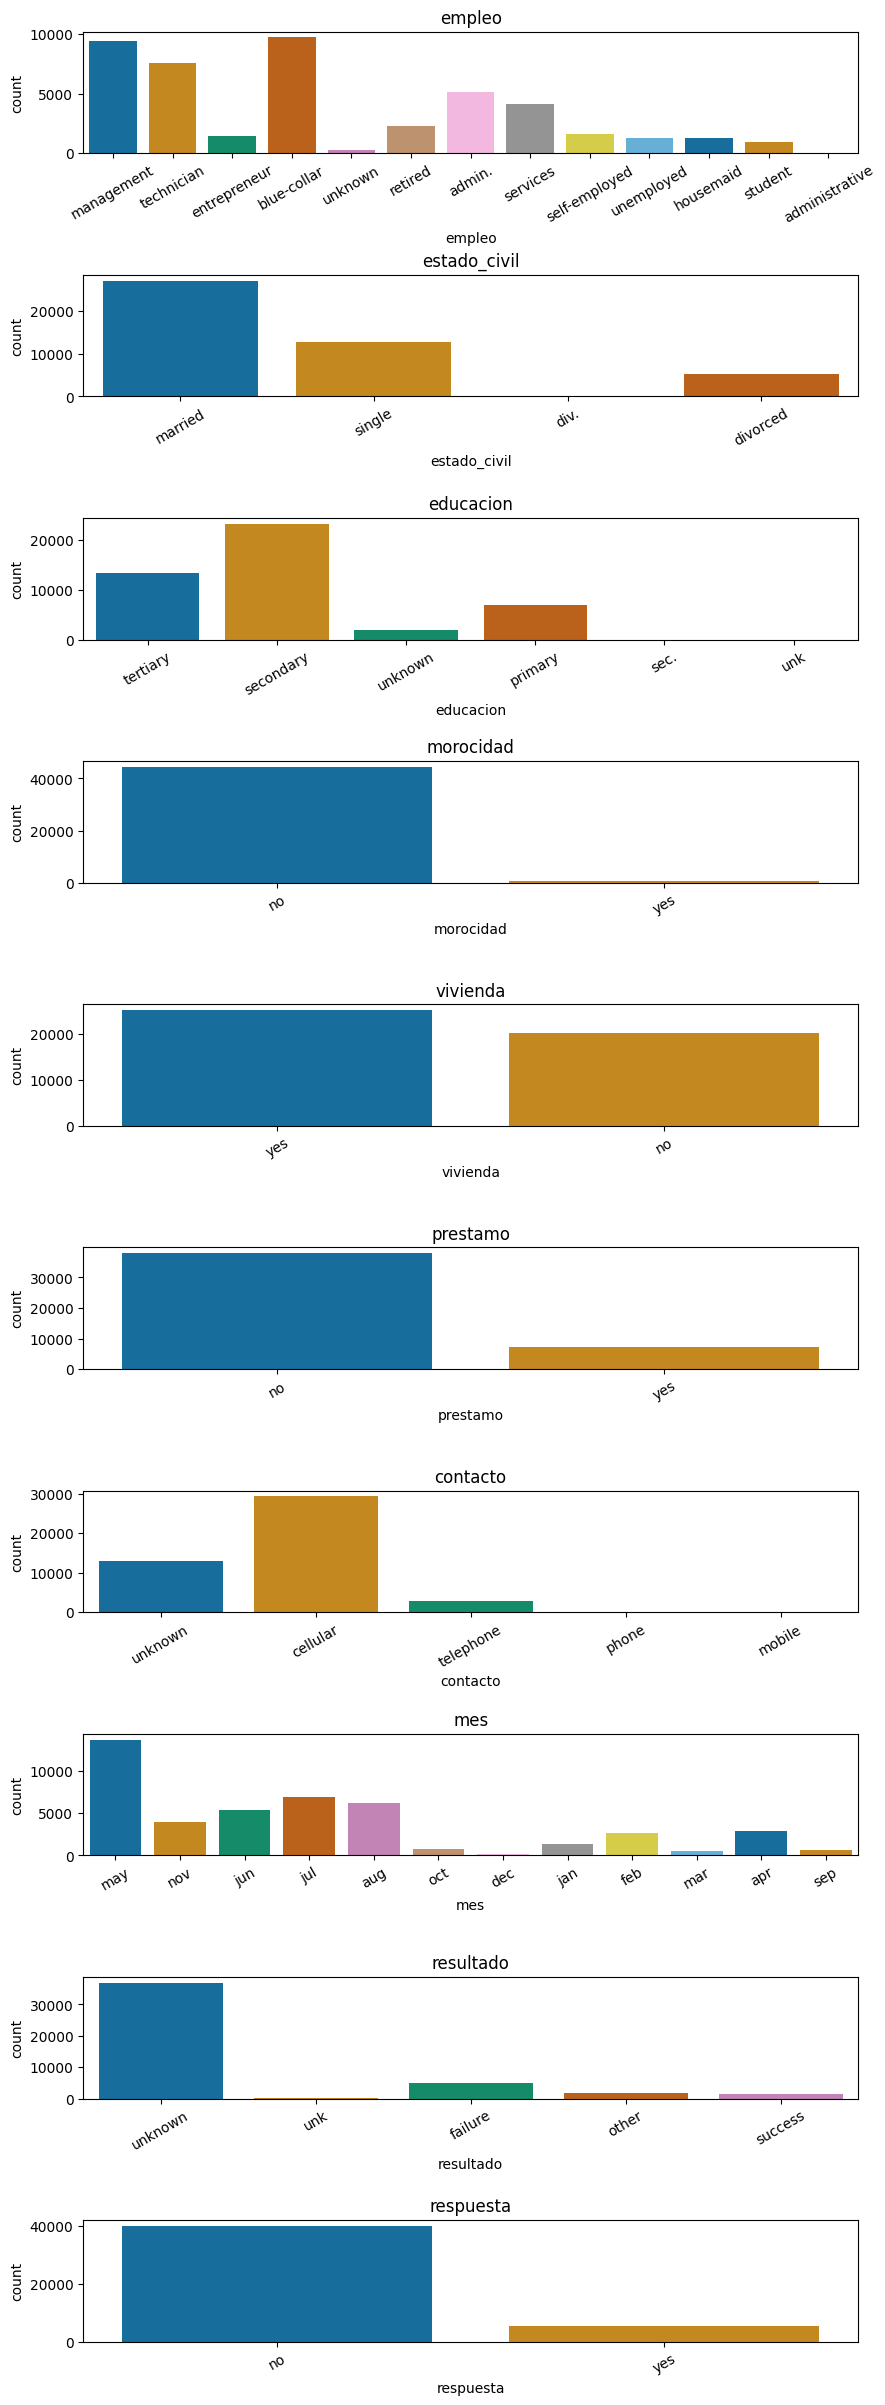

In [149]:
for column in data.columns:
  #Representar en minuscula solo si la columna es categorica
  if column in cols_cat:
    data[column] = data[column].str.lower()

#Y generamos las graficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [150]:
# empleo: unificar admin. y administrative
print(data['empleo'].unique())
data['empleo'] = data['empleo'].str.replace('admin.','administrative', regex=False)
print(data['empleo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [151]:
# estado_civil: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [152]:
# educacion: unificar sec. y secondary, unk y unknown
print(data['educacion'].unique())
data['educacion'] = data['educacion'].str.replace('sec.','secondary', regex=False)
data.loc[data['educacion']=='unk','educacion']='unknown'
print(data['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [153]:
# contacto: unificar telephone y phone
print(data['contacto'].unique())
data.loc[data['contacto']=='phone','contacto']='telephone'
data.loc[data['contacto']=='mobile','contacto']='cellular'
print(data['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [154]:
# resultado: unificar unk y unknown
print(data['resultado'].unique())
data.loc[data['resultado']=='unk','resultado']='unknown'
print(data['resultado'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


In [155]:
data.shape

(45192, 17)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45192 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   edad          45192 non-null  int64  
 1   empleo        45192 non-null  object 
 2   estado_civil  45192 non-null  object 
 3   educacion     45192 non-null  object 
 4   morocidad     45192 non-null  object 
 5   saldo         45192 non-null  float64
 6   vivienda      45192 non-null  object 
 7   prestamo      45192 non-null  object 
 8   contacto      45192 non-null  object 
 9   dia           45192 non-null  int64  
 10  mes           45192 non-null  object 
 11  duracion      45192 non-null  float64
 12  campaña       45192 non-null  int64  
 13  dias_previos  45192 non-null  float64
 14  anterior      45192 non-null  int64  
 15  resultado     45192 non-null  object 
 16  respuesta     45192 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB
